In [46]:
import sys
sys.path.append('/Users/sdbykov/work/self-supervised-halos/')

In [47]:
import requests
import numpy as np
import h5py
from tqdm import tqdm
import os
from glob import glob
import pandas as pd

%matplotlib inline

from utils.data.tng_query import get, HaloInfo
from utils.utils import data_path
data_path = data_path+'tng/'

In [48]:
#downloaded_halos = os.listdir(data_path+'/')
downloaded_halos = glob(data_path+'/*_cutout.hdf5')
downloaded_halos = [halo.split('_')[1] for halo in downloaded_halos]
downloaded_halos = list([int(i) for i in downloaded_halos])
downloaded_halos.sort()

In [49]:
subhalos_df = pd.read_pickle(data_path[:-4]+'subhalos_df.pkl')

In [50]:
downloaded_halos[0:5]

[0, 24681, 44062, 59551, 74363]

In [61]:
df = pd.read_pickle(data_path[:-4]+'subhalos_df.pkl')
#save again as csv
df.to_csv(data_path[:-4]+'subhalos_df.csv')



In [63]:
test = pd.read_csv(data_path[:-4]+'subhalos_df.csv', index_col=0)
test

,SubhaloCM,SubhaloGrNr,SubhaloHalfmassRad,SubhaloHalfmassRadType,SubhaloIDMostbound,SubhaloLen,SubhaloLenType,SubhaloMass,SubhaloMassInHalfRad,SubhaloMassInHalfRadType,...,SubhaloMassInRad,SubhaloMassInRadType,SubhaloMassType,SubhaloParent,SubhaloPos,SubhaloSpin,SubhaloVel,SubhaloVelDisp,SubhaloVmax,SubhaloVmaxRad
subhaloID,,,,,,,,,,,,,,,,,,,,,
0,[ 825.4651 26360.812 18043.373 ],0,650.651200,[ 0. 650.6512 0. 0. 0. ...,5797961333,47955681,[ 0 47955681 0 0 0 ...,28771.916000,0.0,[0. 0. 0. 0. 0. 0.],...,0.0,[0. 0. 0. 0. 0. 0.],[ 0. 28771.916 0. 0. 0...,0,[ 856.0168 26345.18 18318.504 ],[ 14445.006 911.0099 -29002.348 ],[ 26.606678 -237.90837 -74.87299 ],635.132300,981.919500,366.044250
24681,[19805.244 47818.293 48904.41 ],1,736.517460,[ 0. 736.51746 0. 0. 0. ...,2325180566,45435206,[ 0 45435206 0 0 0 ...,27259.709000,0.0,[0. 0. 0. 0. 0. 0.],...,0.0,[0. 0. 0. 0. 0. 0.],[ 0. 27259.709 0. 0. 0...,0,[19696.723 47432.613 48919.953],[ 2429.1704 -16896.656 -18658.27 ],[-179.63759 64.59025 -5.3692527],625.554600,915.306150,977.527700
44062,[23815.764 33120.215 41404.504],2,402.670840,[ 0. 402.67084 0. 0. 0. ...,1987826536,23858229,[ 0 23858229 0 0 0 ...,14314.195000,0.0,[0. 0. 0. 0. 0. 0.],...,0.0,[0. 0. 0. 0. 0. 0.],[ 0. 14314.195 0. 0. 0...,0,[23862.78 33081.965 41393.355],[ 1515.6438 -6503.139 34774.26 ],[-146.78537 302.1386 163.79387],531.998600,882.996300,293.746250
59551,[10984.191 50821.13 47625.277],3,541.652340,[ 0. 541.65234 0. 0. 0. ...,864268477,38959666,[ 0 38959666 0 0 0 ...,23374.588000,0.0,[0. 0. 0. 0. 0. 0.],...,0.0,[0. 0. 0. 0. 0. 0.],[ 0. 23374.588 0. 0. 0...,0,[10904.087 50859.2 47598.504],[ 11352.895 -1797.9346 -55533.15 ],[281.56152 -93.37164 79.82162],594.152650,963.913100,576.757500
74363,[68437.766 59068.484 54036.723],4,465.475220,[ 0. 465.47522 0. 0. 0. ...,4983576378,23558059,[ 0 23558059 0 0 0 ...,14134.103000,0.0,[0. 0. 0. 0. 0. 0.],...,0.0,[0. 0. 0. 0. 0. 0.],[ 0. 14134.103 0. 0. 0...,0,[68559.01 59030.53 53987.703],[ -8654.632 -21578.49 18774.68 ],[158.13545 67.56957 182.22719],490.611970,826.877100,313.814670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958184,[19628.703 73197.56 32715.139],18249,23.170107,[ 0. 23.170107 0. 0. 0. ...,1326341395,11817,[ 0 11817 0 0 0 0],7.089832,0.0,[0. 0. 0. 0. 0. 0.],...,0.0,[0. 0. 0. 0. 0. 0.],[0. 7.0898323 0. 0. 0. ...,0,[19629.096 73196.43 32714.293],[ 87.18905 -26.75527 1.2936268],[ 57.95097 60.15132 -17.731844],46.138690,86.096900,10.208807
958375,[ 4825.373 24298.955 16737.156],18280,24.481579,[ 0. 24.481579 0. 0. 0. ...,755109533,11755,[ 0 11755 0 0 0 0],7.052634,0.0,[0. 0. 0. 0. 0. 0.],...,0.0,[0. 0. 0. 0. 0. 0.],[0. 7.0526342 0. 0. 0. ...,0,[ 4823.0967 24299.318 16737.174 ],[-19.911167 -48.11586 98.87328 ],[-605.6193 -90.92572 197.75418],45.465690,85.824394,7.463528
958424,[23199.18 12566.774 15933.126],18291,20.256176,[ 0. 20.256176 0. 0. 0. ...,2504767413,11768,[ 0 11768 0 0 0 0],7.060434,0.0,[0. 0. 0. 0. 0. 0.],...,0.0,[0. 0. 0. 0. 0. 0.],[0. 7.060434 0. 0. 0. ...,0,[23198.848 12567.037 15933.625],[ 29.60156 -72.45479 -242.11879],[-325.18045 -94.26067 10.760697],48.308132,92.236725,8.279077


/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:274: RuntimeWarning: divide by zero encountered in log10
  map_2d = np.log10(map_2d/np.nanmax(map_2d))
/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:274: RuntimeWarning: divide by zero encountered in log10
  map_2d = np.log10(map_2d/np.nanmax(map_2d))


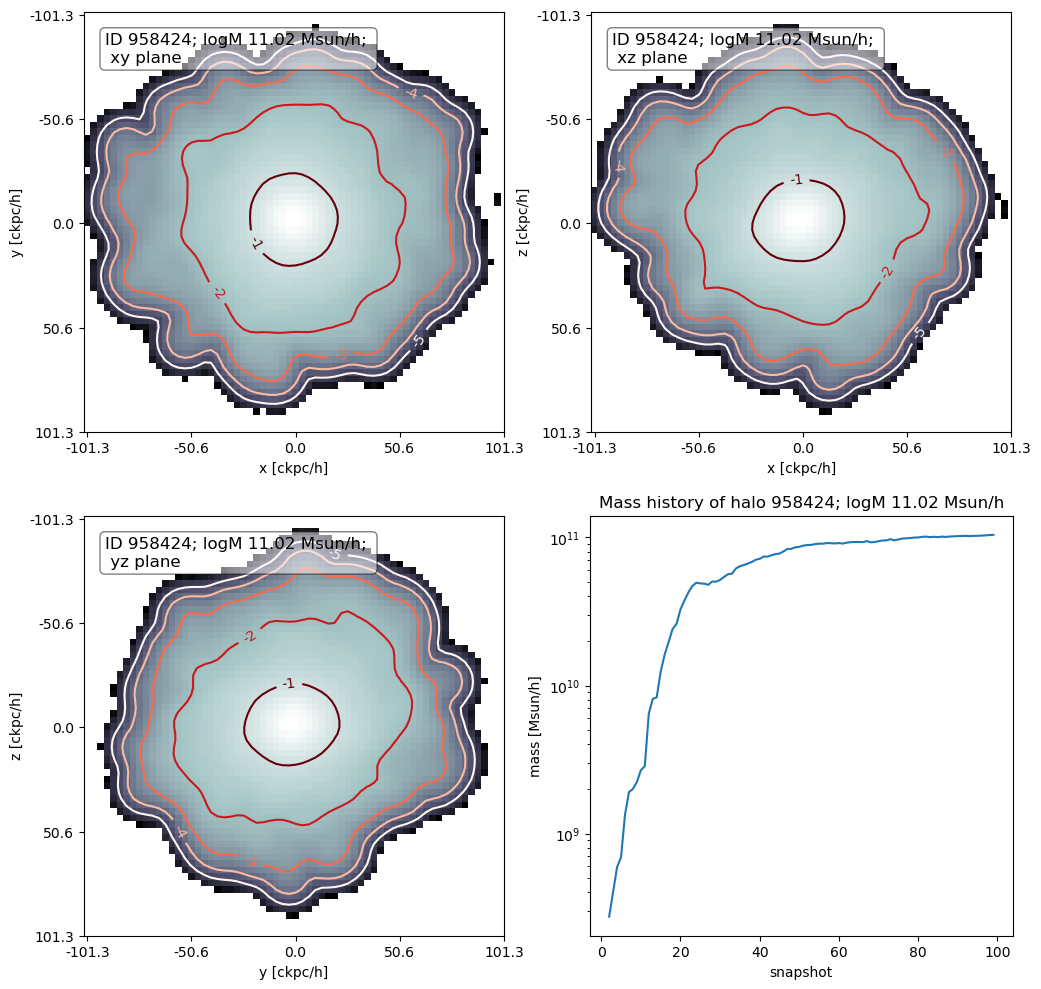

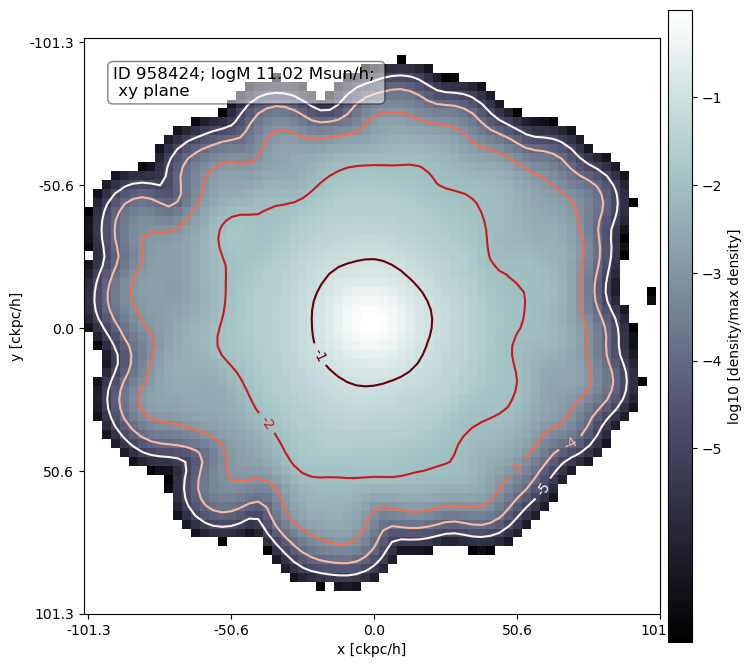

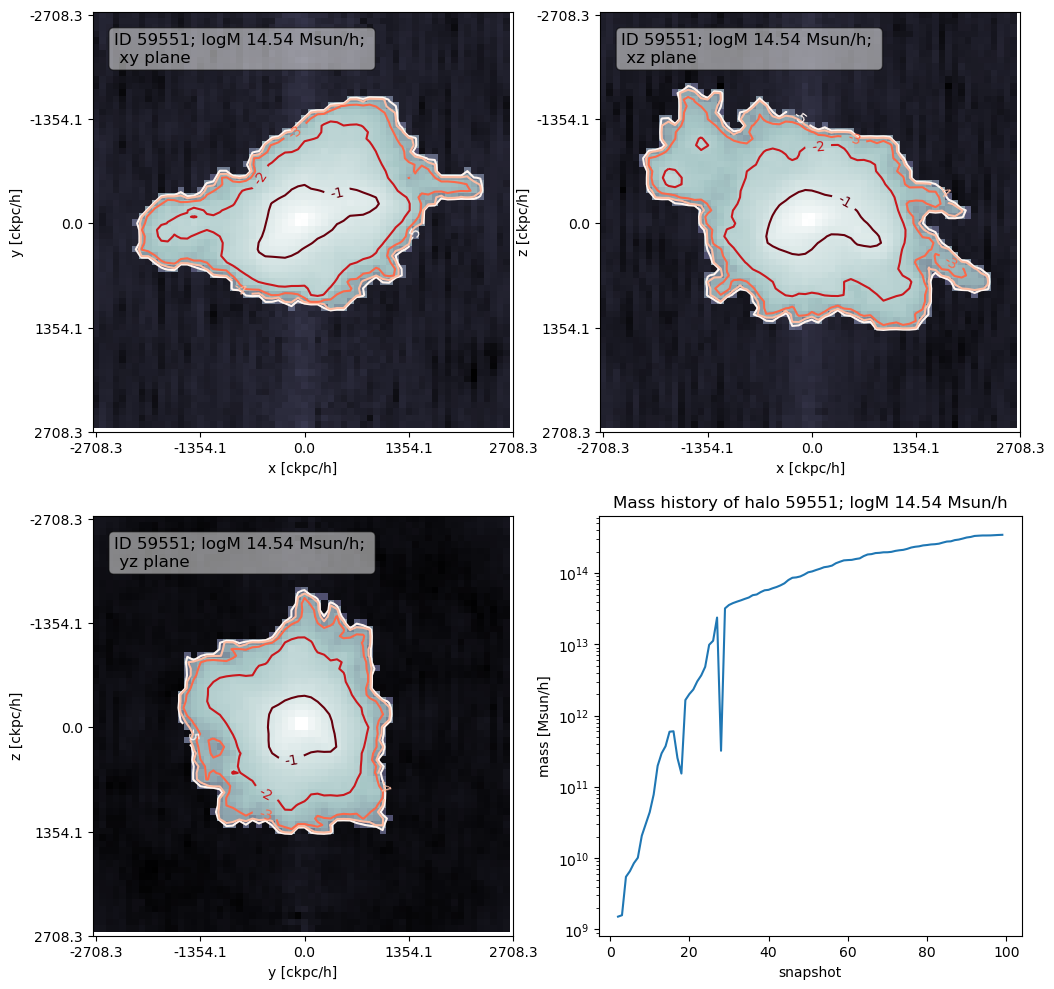

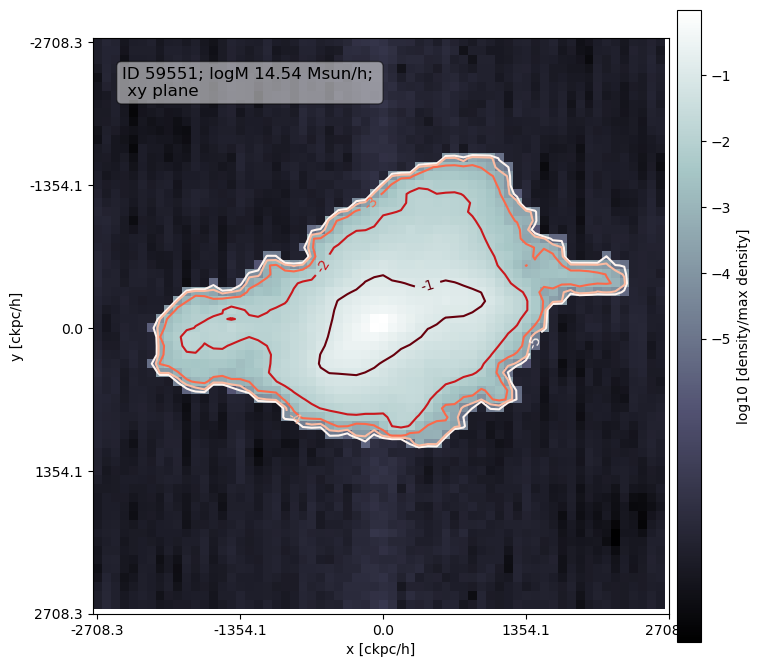

In [51]:
from utils.data.tng_query import HaloInfo

halo_lowmass = HaloInfo(downloaded_halos[-3])
halo_highmass = HaloInfo(downloaded_halos[3])

for halo in [halo_lowmass, halo_highmass]:
    dens = halo.make_3d_density(grid_bins=64, box_half_size=-5)
    halo.plot_all(dens)

In [53]:
arr = dens['hist']

In [57]:
n = arr.size
prop_zeros = np.sum(arr == 0) / n
print(f'Fraction of zeros: {prop_zeros:.2f}')

#save dens['hist'] with pickle
import pickle

with open(data_path[:-4]+'density.pkl', 'wb') as f:
    pickle.dump(dens['hist'], f)

#array is mostly zeros, so we can save it as sparse 

from scipy.sparse import csr_matrix

arr_sparse = csr_matrix(arr)




Fraction of zeros: 0.93


TypeError: expected dimension <= 2 array or matrix

In [18]:
dens.keys()

dict_keys(['hist', 'hist_smoothed', 'edges', 'edge_binsize', 'box_half_size', 'half_mass_rad', 'is_in_units_of_halfmassrad', 'projections', 'projections_smoothed'])

In [19]:
#save dens['hist_smoothed']

np.savez(data_path[:-4]+'halo_lowmass.npz', hist_smoothed=dens['hist_smoothed'])
np.savez(data_path[:-4]+'halo_lowmass_proj.npz', hist_smoothed=dens['projections_smoothed']['yz'])

In [20]:
arr = dens['hist_smoothed']

In [26]:
arr = dens['hist'].astype(np.float64)
np.savez(data_path[:-4]+'halo_lowmass_64.npz', hist_smoothed=arr)


In [30]:
dens['hist'].dtype

dtype('float32')

In [34]:
np.max(dens['hist'].astype(np.int32))

365467

In [36]:
np.max(dens['hist'])
arr = dens['hist'].astype(np.int32)
np.savez(data_path[:-4]+'halo_lowmass_int32.npz', hist_smoothed=arr)


In [39]:
np.log10(2**32)

9.632959861247398